In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import shapefile as shp
import re
from OSGridConverter import grid2latlong
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
from pyproj import Transformer

In [2]:
LCMS_df = pd.read_table('LCMS Target Screening detections raw data 2023-08-02.tsv')
GCMS_df = pd.read_table('GCMS Target Screening detections raw data 2023-08-02.tsv')

#print(LCMS_df['year'].unique())
#print(GCMS_df['year'].unique())

In [3]:
#LCMS_df.head(300)
GCMS_df.head()

LCMS_df = LCMS_df.join(GCMS_df, lsuffix='Sample_Site_ID')

In [4]:
unique_uses = LCMS_df["USE"].tolist()

#chemical patterns
simplified_usage_list = []
patternP='DEET|Pesticide|Intermediate; Pesticides|Insecticide|2,4-D preparation'
patternE='Veterinary|Equine|Eterinary drug'
patternd='Quinoline|Diclofenac|Scabicidal|Mucoactive|Lipid|Pharmaceutical|Prohoromome|Anticonvulsant|Antihistamine|HIV protease inhibitor|Antihyperlipemic|Benzodiazepine|Anti-anxiety|Treat anxiety|Anesthetic|Antiarrhythmic|Antiandrogen medication|Nitroimidazole|Sedative|Antidepressant|Nonsteroidal|Analgesic|Antiplatelet|Anticholesteremic|Antihypertonic|Anti-Inflammatory|Antihypertensive|Antibiotic|Antiseptic|H2-Blocker|Antineoplastic|Antimicrobial|Antidiabetic|Antiulcerative|analgesic|Prostaglandin analogue|Gyrase inhibitor|Hormone|Antiparkinsonian|Cholesterol|Opiate used to treat pain|Sedatine|Hypnotic'
patternF='Flame|flame|fire|Fire'
patternA='Artificial'
patternadd='Sterol|Addictive|Cannabinoid|cannabinoid|Stimulant|stimulant'
patterns='Surfactant'
patternp='Plasticizer|Plasticiser|Phenol derivative'
patternuv=' UV stabilizer|UV Stablizer'
patternint='Methylphenol|intermediate|Intermediate; Solvent|Intermediate|Intermediate; Dyes|Intermediate; Polymerization inhibitor; Oxidizing agent'
patternpers='Soap|Sunscreens|Cosmetics|Perfume|Personal'
patternpcb='PCB'
patternpres='Antioxidant|Flavor|antioxidant|additive|Flavour|Preservative|preservative'
patterndye='Dye|dye'
patternsolv='Solvent|solvent'
patternpoly='Polymer|polymer'
patternses='Sesquiterpene'

#add column that gives chmeical type
for chemical in unique_uses:
    if re.search(patternP,chemical):
        simplified_usage_list.append('Pesticide or Insecticide')
    elif re.search(patternE,chemical):
        simplified_usage_list.append('Veterinary Drug')
    elif re.search(patternd,chemical):
        simplified_usage_list.append('Prescription Drug')
    elif re.search(patternF,chemical):
        simplified_usage_list.append('Fire fighting or retardant')
    elif re.search(patternA,chemical):
        simplified_usage_list.append('Artificial Sweetener')
    elif re.search(patternadd,chemical):
        simplified_usage_list.append('Addictive Drug')
    elif re.search(patterns,chemical):
        simplified_usage_list.append('Surfactant')
    elif re.search(patternp,chemical):
        simplified_usage_list.append('Plasticizer')
    elif re.search(patternuv,chemical):
        simplified_usage_list.append('UV Stabilizer')
    elif re.search(patternpers,chemical):
        simplified_usage_list.append('Personal Care Products')
    elif re.search(patternint,chemical):
        simplified_usage_list.append('Intermediate')
    elif re.search(patternpcb,chemical):
        simplified_usage_list.append('PCB')
    elif re.search(patternpres,chemical):
        simplified_usage_list.append('Food Additive')
    elif re.search(patterndye,chemical):
        simplified_usage_list.append('Dye')
    elif re.search(patternsolv,chemical):
        simplified_usage_list.append('Solvent')
    elif re.search(patternpoly,chemical):
        simplified_usage_list.append('Polymer')
    elif re.search(patternses,chemical):
        simplified_usage_list.append('Sesquiterpene')
    else:
        simplified_usage_list.append(chemical)

#check columns
LCMS_df['Usages'] = simplified_usage_list
LCMS_df.head(100)

,Sample_Site_IDSample_Site_ID,MEAS_DETERMINAND_CODESample_Site_ID,SAMP_IDSample_Site_ID,Screening_Method_Details_CodeSample_Site_ID,SAMP_MATERIALSample_Site_ID,SMC_DESCSample_Site_ID,SAMP_PURPOSE_CODESample_Site_ID,PURP_DESCSample_Site_ID,Sample_datetimeSample_Site_ID,SMPT_LONG_NAMESample_Site_ID,...,unit,less_than,CAS_Number,Compound_Name,LOD,USE,method,year,month_and_year,Usages
0,49100464,7299,1621248,TS1,2HZZ,ESTUARINE WATER,MS,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,2018-10-26 11:33:00,OUSE AT BLACKTOFT JETTY,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2022,Apr 2022,Intermediate
1,50050,7299,4769008,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MU,MONITORING (UK GOVT POLICY - NOT GQA OR RE),2021-03-22 10:43:00,R LUGG AT MORDIFORD BRIDGE,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2011,Sep 2011,Intermediate
2,400G0116,7299,1603090,TS1,2EZZ,GROUNDWATER,SI,STATUTORY FAILURES (FOLLOW UPS AT NON-DESIGNAT...,2018-02-20 13:40:00,HOWE FARM NORTH OF BURTON FLEMING,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2015,Jul 2015,Intermediate
3,NENE550W,7299,1949209,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MS,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,2019-11-06 11:27:00,R.NENE WANSFORD OLD RD.BR.,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2016,Jun 2016,Intermediate
4,50050,7299,4798170,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MU,MONITORING (UK GOVT POLICY - NOT GQA OR RE),2022-06-17 10:33:00,R LUGG AT MORDIFORD BRIDGE,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2011,Oct 2011,Intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,G0003890,7299,1587560,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MS,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,2022-10-12 09:29:00,RIVER TEST AT LONGBRIDGE,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2013,Oct 2013,Intermediate
96,RSN1546,7299,4767082,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MN,MONITORING (NATIONAL AGENCY POLICY),2021-02-11 13:26:00,RSN1546 R. STOUR CRIMSCOTE,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2017,Jun 2017,Intermediate
97,RSN1546,7299,4772187,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MN,MONITORING (NATIONAL AGENCY POLICY),2021-05-12 14:32:00,RSN1546 R. STOUR CRIMSCOTE,...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2014,Mar 2014,Intermediate
98,49100488,7299,1699993,TS1,2AZZ,RIVER / RUNNING SURFACE WATER,MU,MONITORING (UK GOVT POLICY - NOT GQA OR RE),2022-05-19 14:47:00,OUSE AT NETHER POPPLETON (SKELTON BANK),...,ug/l,False,87412,1(3H)-Isobenzofuranone,0.01,Intermediate,GCMS,2012,Sep 2012,Intermediate


In [5]:
#chemical category list
unique_usages = LCMS_df['Usages'].unique()
print(unique_usages)

['Intermediate' 'Pesticide or Insecticide' 'Plasticizer' 'UV Stabilizer'
 'Solvent' 'Prescription Drug' 'Plant growth regulator'
 'Hazardous substance controlled by the Dangerous Substances Directive'
 'PCB' 'Catalyst' 'UV Absorber' 'Dye' 'Precursor' 'Fragrance agent'
 'Synthesis' 'Dielectric fluid' 'Solubilizate' 'Personal Care Products'
 'Acetylenic hydrocarbon' 'Polymer' 'Poly Aromatic Hydrocarbon (PAH)'
 'Food Additive' 'Chemical reagent' 'Fire fighting or retardant'
 'Sunscreen blocker' 'Process regulator' 'Endocrine disruptor'
 'Surfactant' 'Veterinary Drug' 'Corrison Inhibiter; Drug Precusor '
 'Vulcanization Accelerator' 'Addictive Drug'
 'EU regulated contact allergen' 'Chemical reagent; Explosives'
 'Manufacture of polymethyl methacrylate acrylic plastics (PMMA)' 'Furan'
 'Sesquiterpene' 'Disinfection by-product'
 'Unsaturated polyester; Resins; Adhesives; Paints.' 'Chemosterilant'
 'Plant Growth Regulator' 'Actinobacteria; Earthy flavor and aroma '
 'Alkane hydrocarbon' 'Pet

In [6]:
#LCMS_df.to_csv('LCMS.csv')

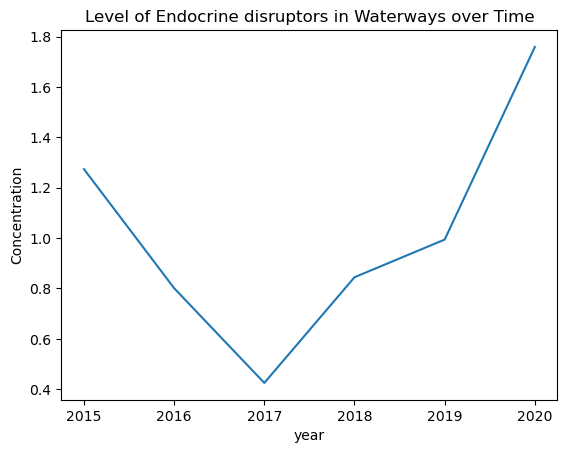

In [7]:
#list of types of waterways
unique_locations = LCMS_df['SMC_DESC'].unique()
#print(unique_locations)

#concat groundwater types in one column
groundwater = "GROUNDWATER"
water_type_list = LCMS_df['SMC_DESC'].tolist()
new_water_list = []

for water in water_type_list:
    if re.search(groundwater,water):
        new_water_list.append("GROUNDWATER")
    else:
        new_water_list.append(water)

LCMS_df['Water Type Simplified'] = new_water_list
#plot chemical levels over time
def plot_years(chemical_type, g_title):
    year_df = pd.DataFrame(LCMS_df.loc[(LCMS_df["Usages"] == chemical_type) & (LCMS_df['year'] > 2014) & 
                                       (LCMS_df['year'] < 2021)]) 
    unique_chemical_timeline = year_df.groupby('year')['Concentration'].mean()
    sns.lineplot(data=unique_chemical_timeline, x='year', y=unique_chemical_timeline).set(title=g_title)
    
#plot_years("Pesticide or Insecticide", "Level of Pesticides in Waterways over Time")
#plot_years("Addictive Drug", "Level of Addictive Drugs in Waterways over Time")
#plot_years("Prescription Drug", "Level of Prescription Drugs in Waterways over Time")
#plot_years("Plasticizer", "Level of Plasticizers in Waterways over Time")
plot_years("Endocrine disruptor", "Level of Endocrine disruptors in Waterways over Time")
#plot_years("Disinfectant", "Level of Disinfectants in Waterways over Time")
#plot_years("Polymer", "Level of Polymers in Waterways over Time")
#plot_years("Corrison Inhibiter; Drug Precusor ", "Level of Corrison Inhibitors in Waterways over Time")
#plot_years("Personal Care Products", "Level of Personal Care Products in Waterways over Time")

#print(LCMS_df["Year"].unique())

In [8]:
#lists of unique chemicals and unique prescription drugs
unique_chemical_groundwater = LCMS_df['Usages'].unique().tolist()
prescription_drug_list = LCMS_df.loc[LCMS_df['Usages'] == 'Prescription Drug', 'USE']
print(prescription_drug_list.unique())

#function to make graphs based on different waterway types
def plot_waterway_graphs(waterway_type, g_title, sample_list, x_label):
    groundwater_df = LCMS_df.loc[(LCMS_df["SMC_DESC"] == waterway_type) & (LCMS_df["year"] > 2019)]
    unique_chemical_list = groundwater_df.groupby(sample_list)['Concentration'].mean()
    unique_chemical_list.plot(xlabel=x_label, ylabel='Number of Chemical Occurences', 
                             title=g_title, kind='bar',subplots=True)

#plot_waterway_graphs("GROUNDWATER", "Chemicals in Groundwater", 'Usages', 
                    #'Chemical Types')
#plot_waterway_graphs("RIVER / RUNNING SURFACE WATER", "Chemicals in Rivers or other Running Surface Waters", 'Usages', 
                     #'Chemical Types')
#plot_waterway_graphs("ESTUARINE WATER", "Chemicals in Estuarine Water", 'Usages', 
                    #'Chemical Types')
#plot_waterway_graphs("SEA WATER", "Chemicals in Seawater", 'Usages', 
                     #'Chemical Types')
#plot_waterway_graphs("POND / LAKE / RESERVOIR WATER", "Chemicals in Ponds, Lakes, or Reservoirs", 'Usages', 
                     #'Chemical Types')
#plot_waterway_graphs("ANY TRADE EFFLUENT", "Chemicals Discharged into Sewers from Industrial Waste", 'Usages', 
                     #'Chemical Types')


['Anesthetic' 'Mild Sedative'
 'Intermediate; Pharmaceuticals; Agrochemicals; Dyes'
 'Antiseptic; Preservative' 'Quinoline derivative' 'Mucoactive drug'
 'Prohoromome' 'Pharmaceutical intermediate'
 'Anticonvulsant; Antiepileptic' 'Opiate used to treat pain'
 'Anesthetic; Antiarrhythmic' 'Sedatine; Hypnotic'
 'Pharmaceutical preparation;\xa0Preservative' 'Antiseptic; Antimicrobial'
 'Lipid-lowering agent ' 'Scabicidal; Antipruritic'
 'Indicator for the presence of Diclofenac (anti-inflammatory)'
 'Pharmaceutical; Treating multiple sclerosis (MS)' 'Antidepressant'
 'Analgesic; Antipyretic' 'Antitumor; Antibiotic; Diuretic']


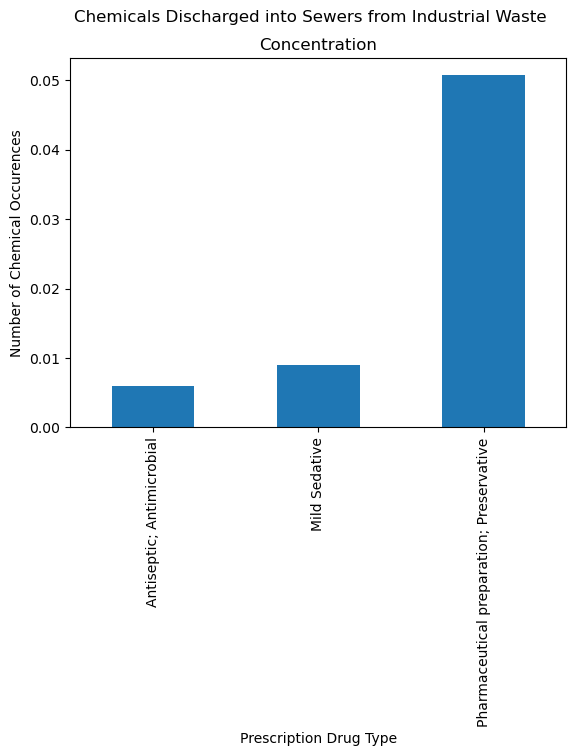

In [9]:
#get graphs of unique prescription drugs
#plot_waterway_graphs("POND / LAKE / RESERVOIR WATER", "Chemicals in Ponds, Lakes, or Reservoirs", 
                    # prescription_drug_list,'Prescription Drug Type')
#plot_waterway_graphs("GROUNDWATER", "Chemicals in Groundwater", 
                     #prescription_drug_list, 'Prescription Drug Type')
#plot_waterway_graphs("RIVER / RUNNING SURFACE WATER", "Chemicals in Rivers or Other Running Surface Waters", 
                     #prescription_drug_list, 'Prescription Drug Type')
#plot_waterway_graphs("ESTUARINE WATER", "Chemicals in Estuarine Water", 
                     #prescription_drug_list, 'Prescription Drug Type')
#plot_waterway_graphs("SEA WATER", "Chemicals in Seawater", 
                     #prescription_drug_list, 'Prescription Drug Type')
plot_waterway_graphs("ANY TRADE EFFLUENT", "Chemicals Discharged into Sewers from Industrial Waste", prescription_drug_list, 
                    'Prescription Drug Type')


#update graphs
#map of UK
#multiple linear regression for ecotox data


In [10]:
#LCMS_df.to_csv('LCMS.csv')

<AxesSubplot:xlabel='Compound_Name', ylabel='Concentration'>

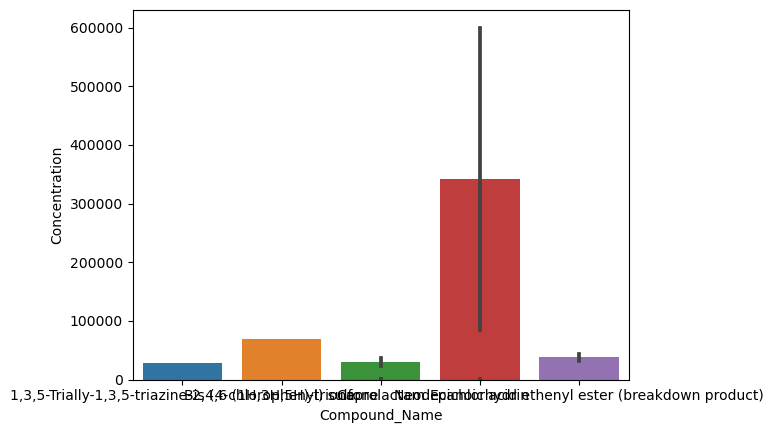

In [11]:
#pesticides and insecticides list
#endocrine disruptors list
#plasticizers list
#solvents list
#Addictive drugs list
#personal care products list

#highest pesticide concentration graph
pesticide_df = LCMS_df.loc[LCMS_df["Usages"] == 'Pesticide or Insecticide']
high_pesticides = pesticide_df.loc[pesticide_df["Concentration"] >= 20000]
pesticide_df['Compound_Name'].unique()

sns.barplot(x='Compound_Name', y='Concentration', data=high_pesticides)

#highest endocrine disruptor graph
endocrine_df = LCMS_df.loc[LCMS_df["USE"]=='Endocrine disruptor']
endocrine_df.head()

sns.barplot(x='Compound_Name', y='Concentration', data=endocrine_df)

#highest anesthetic graph
anesthetic_df = LCMS_df.loc[(LCMS_df["USE"] == 'Anesthetic') | (LCMS_df["USE"] == 'Anesthetic; Antiarrhythmic')]
sns.barplot(x='Compound_Name', y='Concentration', data=anesthetic_df)

#highest sedative graph
sedative_df = LCMS_df.loc[LCMS_df["USE"] == 'Mild Sedative']
sns.barplot(x='Compound_Name', y='Concentration', data=sedative_df)

#highest addictive drug graph
addictive_df = LCMS_df.loc[LCMS_df["Usages"] == "Addictive Drug"]
sns.barplot(x='Compound_Name', y="Concentration", data=addictive_df)

#highest prescription drug graph
script_df = LCMS_df.loc[(LCMS_df["Usages"] == "Prescription Drug") & (LCMS_df["Concentration"] > 100)]
sns.barplot(x='Compound_Name', y="Concentration", data=script_df)

#highest plasticizers
plasticizer_df = LCMS_df.loc[(LCMS_df["Usages"] == "Plasticizer") & (LCMS_df["Concentration"] > 100)]
sns.barplot(x='Compound_Name', y="Concentration", data=plasticizer_df)

#highest polymers
polymer_df = LCMS_df.loc[LCMS_df["Usages"] == "Polymer"]
sns.barplot(x='Compound_Name', y="Concentration", data=polymer_df)

#highest corrison inhibitors
#corrison_df = LCMS_df.loc[LCMS_df["Usages"] == "Corrison Inhibiter; Drug Precusor "]
#sns.barplot(x='Compound_Name', y="Concentration", data=corrison_df)

['NORTH WEST - GTR MANCS MERSEY AND CHES' 'THAMES - WEST THAMES'
 'SOUTHERN - KENT AND SOUTH LONDON'
 'MIDLANDS - STAFFS WARKS AND WEST MIDS'
 'ANGLIAN - CAMBS AND BEDFORDSHIRE'
 'NORTH EAST - NORTHUMBERLAND DURHAM AND TEES'
 'THAMES - HERTS AND NORTH LONDON' 'SOUTH WEST - DEVON AND CORNWALL'
 'NORTH WEST - CUMBRIA AND LANCASHIRE'
 'ANGLIAN - ESSEX NORFOLK AND SUFFOLK' 'ANGLIAN - LINCS AND NORTHANTS'
 'SOUTHERN - SOLENT AND SOUTH DOWNS' 'SOUTH WEST - WESSEX'
 'MIDLANDS - SHROPS HEREF WORCS AND GLOS' 'THAMES - KENT AND SOUTH LONDON'
 'NORTH EAST - YORKSHIRE' 'MIDLANDS - DERBYS NOTTS AND LEICS' 'Regional']
18


<AxesSubplot:xlabel='Usages', ylabel='Concentration'>

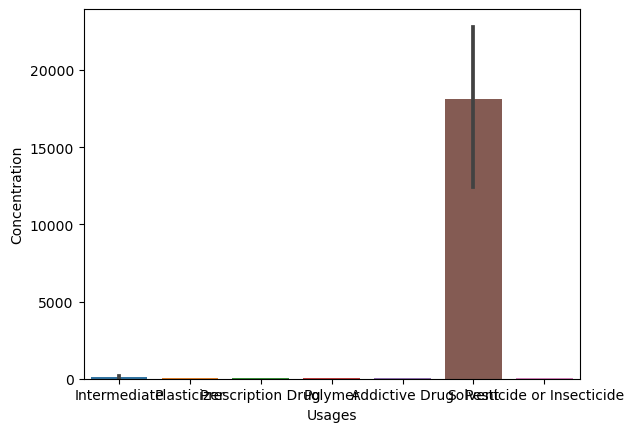

In [12]:
geo_list = LCMS_df['ARE_DESC']
print(LCMS_df['ARE_DESC'].unique())
print(len(LCMS_df['ARE_DESC'].unique()))

LCMS_northeast = LCMS_df.loc[(LCMS_df['ARE_DESC']=='NORTH EAST - NORTHUMBERLAND DURHAM AND TEES') & 
                             (LCMS_df['Concentration'] > 50)]
LCMS_northeast.head()

sns.barplot(x='Usages', y='Concentration', data=LCMS_northeast)

In [15]:
#match patterns from each geo area
#add to lat list
#add to long list
#map

patternmancs = "MANCS"
patternthames = "WEST THAMES"
patternkent = "KENT"
patternmid = "WARKS"
patternangl = "CAMBS"
patternnorth = "NORTHUMBERLAND"
patternherts = "HERTS"
patternsouth = "DEVON"
patterncumbria = "CUMBRIA"
patternessex = "ESSEX"
patternlincs = "LINCS"
patternsolent = "SOLENT"
patternwessex = "WESSEX"
patternheref = "HEREF"
patternyorkshire = "YORKSHIRE"
patternderbys = "DERBYS"

lat_list = []
long_list = []

for location in geo_list:
    if (re.search(patternmancs, location)):
        lat_list.append(53.286556)
        long_list.append(-2.863506)
    elif (re.search(patternthames, location)):
        lat_list.append(51.486425)
        long_list.append(-0.12859)
    elif (re.search(patternkent, location)):
        lat_list.append(51.195042)
        long_list.append(0.275680)
    elif (re.search(patternmid, location)):
        lat_list.append(52.633331)
        long_list.append(-1.133333)
    elif (re.search(patternangl, location)):
        lat_list.append(52.136436)
        long_list.append(-0.460739)
    elif (re.search(patternnorth, location)):
        lat_list.append(54.7768)
        long_list.append(-1.5757)
    elif (re.search(patternherts, location)):
        lat_list.append(51.755001)
        long_list.append(-0.336000)
    elif (re.search(patternsouth, location)):
        lat_list.append(50.716667)
        long_list.append(-3.716667)
    elif (re.search(patterncumbria, location)):
        lat_list.append(53.652210)
        long_list.append(-2.619740)
    elif (re.search(patternessex, location)):
        lat_list.append(52.21433)
        long_list.append(0.98768)
    elif (re.search(patternlincs, location)):
        lat_list.append(52.240479)
        long_list.append(-0.902656)
    elif (re.search(patternsolent, location)):
        lat_list.append(50.9110)
        long_list.append(-0.3670)
    elif (re.search(patternwessex, location)):
        lat_list.append(51.68637)
        long_list.append(-2.45553)
    elif (re.search(patternheref, location)):
        lat_list.append(51.864445)
        long_list.append(-2.244444)
    elif (re.search(patternyorkshire, location)):
        lat_list.append(54.0000)
        long_list.append(-1.5000)
    elif (re.search(patternderbys, location)):
        lat_list.append(52.916039)
        long_list.append(-1.319553)
    else:
        lat_list.append(0)
        long_list.append(0)

LCMS_df['lat'] = lat_list
LCMS_df['long'] = long_list

print(LCMS_df.loc[LCMS_df['lat'] == 51.765907])
LCMS_df.head()
LCMS_cv = LCMS_df.to_csv('LCMS.csv')


Empty DataFrame
Columns: [Sample_Site_IDSample_Site_ID, MEAS_DETERMINAND_CODESample_Site_ID, SAMP_IDSample_Site_ID, Screening_Method_Details_CodeSample_Site_ID, SAMP_MATERIALSample_Site_ID, SMC_DESCSample_Site_ID, SAMP_PURPOSE_CODESample_Site_ID, PURP_DESCSample_Site_ID, Sample_datetimeSample_Site_ID, SMPT_LONG_NAMESample_Site_ID, SMPT_TYPESample_Site_ID, SPT_DESCSample_Site_ID, SMPT_EASTINGSample_Site_ID, SMPT_NORTHINGSample_Site_ID, ARE_CODESample_Site_ID, ARE_DESCSample_Site_ID, SMPT_Generic_TYPESample_Site_ID, Screening_Method_DetailsSample_Site_ID, ConcentrationSample_Site_ID, unitSample_Site_ID, less_thanSample_Site_ID, CAS_NumberSample_Site_ID, Compound_NameSample_Site_ID, LODSample_Site_ID, USESample_Site_ID, methodSample_Site_ID, yearSample_Site_ID, month_and_yearSample_Site_ID, Sample_Site_ID, MEAS_DETERMINAND_CODE, SAMP_ID, Screening_Method_Details_Code, SAMP_MATERIAL, SMC_DESC, SAMP_PURPOSE_CODE, PURP_DESC, Sample_datetime, SMPT_LONG_NAME, SMPT_TYPE, SPT_DESC, SMPT_EASTING,